### import tensorflow.compat.v1 as tf
tf.compat.v1.disable_v2_behavior()

import matplotlib.pyplot as plt # 한글 깨짐 조치를 위한 import 
from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic') 

plt.rcParams['axes.unicode_minus'] = False

In [2]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
node1 = tf.constant(3.0) # constant변수로 상수 설정 
node2 = tf.constant(4.0)
node3 = tf.add(node1 , node2) # add 함수로 연산실행
sess = tf.Session() # Session을 지정함으로서 원하는 연산결과 출력요구

print(sess.run([node1 , node2])) # print로 ()안의 변수들의 값 출력
print(sess.run(node3)) # node3는 연산구문이므로 연산된 값 출력

sess.close() # sess close

[3.0, 4.0]
7.0


2021-07-06 23:16:40.987384: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:196] None of the MLIR optimization passes are enabled (registered 0 passes)
2021-07-06 23:16:40.993293: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


In [ ]:
# 경사하강법을 numpy만으로만 사용한것이 아닌 
# tensor을 사용하여 경사하강법 코드 작성 

# 주어진 데이터
data = [[2,81] , [4,93] , [6,91] , [8,97]]
# 데이터 찢기 x 값
x_data = [x_row[0] for x_row in data]
# 데이터 찢기 y 값
y_data = [y_row[1] for y_row in data]

# 기울기 a와 y 절편 b의 값을 임의로 정한다.
# 단, 기울기의 범위는 0 ~ 10 사이이며 , y 절편은 0 ~ 100 사이에서 변하게 한다.
a = tf.Variable(tf.random_uniform([1] , 0 , 10 , dtype = tf.float64 , seed = 0))
b = tf.Variable(tf.random_uniform([1] , 0 , 100 , dtype = tf.float64 , seed = 0))

# y에 대한 1차 방정식 ax + b 의 식을 세운다.
y = a * x_data + b

# 텐서플로 RMSE 함수
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - y_data)))

# 학습률 값
learning_rate = 0.1

# RMSE 값을 최소로 하는 값 찾기
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

# 텐서플로를 이용한 학습
with tf.Session() as sess:
    # 변수 초기화
    sess.run(tf.global_variables_initializer())
    # 2001번 실행(0번째를 포함하므로)
    for step in range(2001):
        sess.run(gradient_decent)
        # 100번마다 결과 출력
        if step % 100 == 0:
            print("Epoch: %f , RMSE = %.04f , 기울기 a = %.4f , y절편 b = %.4f" %(step , sess.run(rmse) , sess.run(a) , sess.run(b)))
            
            

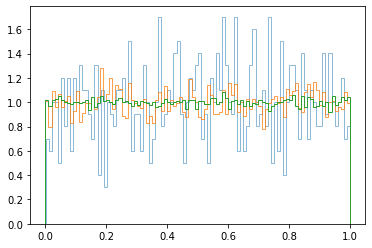

In [10]:
# 정말 간단하게 딥러닝이 뭔지를 보여줌 , Epoch가(연산을 하는 수) 많을수록 더 정확한결과 도출 
# 하지만 연산하는 수에 따라 시간이 다소 소요됨
import numpy as np
import matplotlib.pyplot as plt

a = np.random.rand(1000) 
b = np.random.rand(10000)
c = np.random.rand(100000)

plt.hist(a , bins = 100 , density = True , alpha = 0.5 , histtype = "step")
plt.hist(b , bins = 100 , density = True , alpha = 0.75 , histtype = "step")
plt.hist(c , bins = 100 , density = True , alpha = 1.0 , histtype = "step")
plt.show()

findfont: Font family ['NanumBarunpenBold'] not found. Falling back to DejaVu Sans.


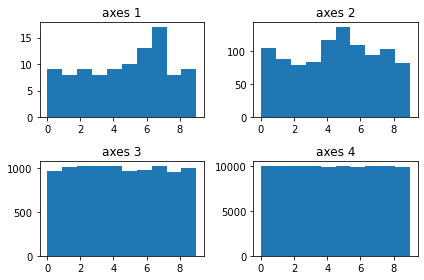

In [11]:
a = np.random.randint(0,10,100)
b = np.random.randint(0,10,1000)
c = np.random.randint(0,10,10000)
d = np.random.randint(0,10,100000)

plt.subplot(221)
plt.hist(a , bins = 10)
plt.title("axes 1")

plt.subplot(222)
plt.hist(b , bins = 10)
plt.title("axes 2")

plt.subplot(223)
plt.hist(c , bins = 10)
plt.title("axes 3")

plt.subplot(224)
plt.hist(d , bins = 10)
plt.title("axes 4")

plt.tight_layout()
plt.show()


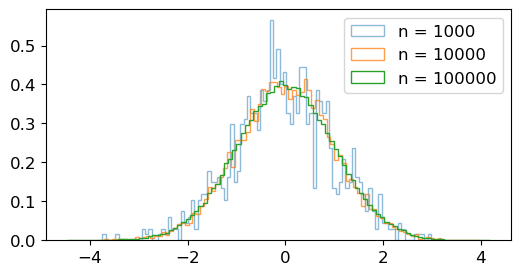

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")
plt.rcParams["figure.figsize"] = (6,3)
plt.rcParams["font.size"] = 12

a = np.random.randn(1000)
b = np.random.randn(10000)
c = np.random.randn(100000)

plt.hist(a , bins = 100 , density = True , alpha = 0.5 , histtype = "step" , label = "n = 1000")
plt.hist(b , bins = 100 , density = True , alpha = 0.75 , histtype = "step" , label = "n = 10000")
plt.hist(c , bins = 100 , density = True , alpha = 1.0 , histtype = "step" , label = "n = 100000")

plt.legend()
plt.show()

In [13]:
# 경사하강법을 tensorflow를 이용해서 간단하게 표현한 식 
data = [[1 , 0.2] , [2 , 0.3] , [3 , 0.5] , [4 , 0.6] , [5 , 0.9] , [6 , 0.95] , [7 , 1.1] , [8 , 1.5]] 

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

a = tf.Variable(tf.random_uniform([1] , 0 , dtype = tf.float64 , seed = 0)) # a , b값을 원하는 범위로 지정
b = tf.Variable(tf.random_uniform([1] , 0 , dtype = tf.float64 , seed = 0))

# y값 구하기
y = a * x_data + b

# 제곱근 오차 구하기
rmse = tf.sqrt(tf.reduce_mean(tf.square( y - y_data)))

learning_rate = 0.001 # 학습률 

# 원하는 목표와 가장 근사하게 갈 수 있는 식을 한줄로 표현 (편미분식을 간단하게 표현)
tensor_edge = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
        sess.run(tensor_edge)
        if step % 5000 == 0:
            print("Epoch: %f , RMSE = %.04f , 기울기 a = %.4f , y절편 b = %.5f" %(step , sess.run(rmse) , sess.run(a) , sess.run(b)))
            

NameError: name 'tf' is not defined

In [14]:
# 위 식의 결과에서 볼 수 있듯이 Epoch가 높을수록 결과는 더욱 정확하게 출력됨(그에 대응하는 시간소요는 당연한것)
data = [[100 , 20] , [150 , 24] , [300 , 36] , [400 , 47] , [130 , 22] , [240 , 32] , [350 , 47] , [200 , 42] , [100 , 21] , [110 , 21] , [190 , 30] , [120 , 25] , [130 , 18] , [270 , 38] , [225 , 28]]
x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

a = tf.Variable(tf.random_uniform([1] , 0 , 1 , dtype = tf.float64 , seed = 0))
b = tf.Variable(tf.random_uniform([1] , 0 , 15 , dtype = tf.float64 , seed = 0))

# y값 구하기
y = a * x_data + b

# 제곱근 오차 구하기
rmse = tf.sqrt(tf.reduce_mean(tf.square( y - y_data)))

learning_rate = 0.00001


tensor_edge = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(250001):
        sess.run(tensor_edge)
        if step % 50000 == 0:
            print("Epoch: %f , RMSE = %.04f , 기울기 a = %.4f , y절편 b = %.5f" %(step , sess.run(rmse) , sess.run(a) , sess.run(b)))
            

NameError: name 'tf' is not defined

In [15]:
# 그래프를 시각화해서 나타내기 위한 import 
import matplotlib.pylab as plt
import matplotlib as mpl

In [16]:
%matplotlib inline

# 아래부터는 다양한 그래프를 간단하게 식만 사용해서 사용방법 기재

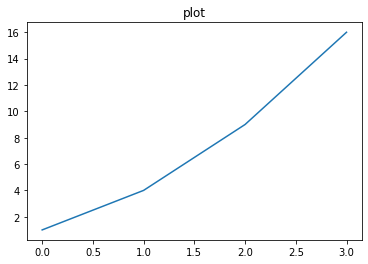

In [17]:
plt.title("plot")
plt.plot([1,4,9,16])
plt.show()

/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0, flags=flags)


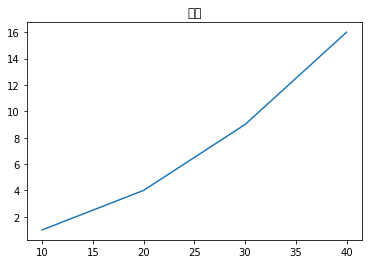

In [18]:
plt.title("제목")
plt.plot([10,20,30,40],[1,4,9,16])
plt.show()

In [19]:
# 한글깨짐을 방지하기 위해 폰트를 다운로드하고 해당 폰트를 찾기위해서 폰트 리스트 출력
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/System/Library/Fonts/Apple Color Emoji.ttc',
 '/System/Library/Fonts/Supplemental/STIXGeneralBol.otf',
 '/System/Library/Fonts/Supplemental/Krungthep.ttf',
 '/System/Library/Fonts/SFNSMonoItalic.ttf',
 '/System/Library/Fonts/Supplemental/Trebuchet MS Bold Italic.ttf',
 '/System/Library/Fonts/Supplemental/STIXIntDBol.otf',
 '/System/Library/Fonts/Supplemental/NotoSansTaiTham-Regular.ttf',
 '/System/Library/Fonts/Apple Braille Outline 6 Dot.ttf',
 '/System/Library/Fonts/Supplemental/Hoefler Text Ornaments.ttf',
 '/System/Library/Fonts/Supplemental/Bodoni Ornaments.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansInscriptionalPahlavi-Regular.ttf',
 '/System/Library/Fonts/Thonburi.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansOldTurkic-Regular.ttf',
 '/System/Library/Fonts/ArabicUIDisplay.ttc',
 '/System/Library/Fonts/Supplemental/PlantagenetCherokee.ttf',
 '/System/Library/Fonts/Apple Braille Outline 8 Dot.ttf',
 '/System/Library/Fonts/Noteworthy.ttc',
 '/System/Library/Fonts/Su

In [20]:
# 아래와 같은식을 폰트를 지정해주면 한글이 깨짐이 없이 출력
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path ='/Users/panhong/Library/Fonts/NanumBarunpenBold.ttf'
plt.rc('font', family='NanumBarunpenBold')

/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50641 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backe

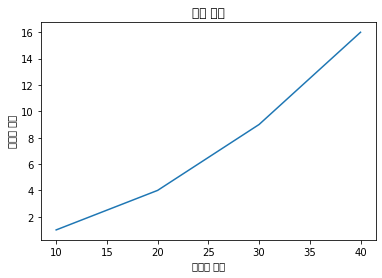

In [21]:
plt.title("한글 제목")
plt.plot([10,20,30,40],[1,4,9,16])
plt.xlabel("엑스축 라벨")
plt.ylabel("와이축 라벨")
plt.show()


/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backe

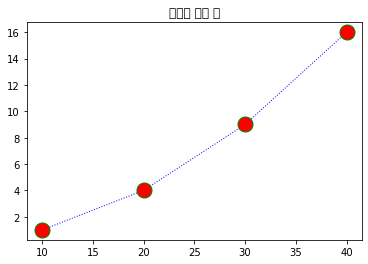

In [22]:
plt.plot([10,20,30,40],[1,4,9,16] , c = "b" ,
        lw = 1 , ls = ":" , marker = "o" , ms = 15 , mec = "g" , mew = 1 , mfc = "r")
plt.title("스타일 적용 예")
plt.show()

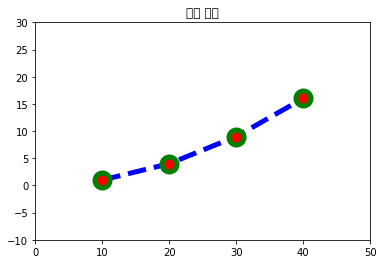

In [23]:
plt.title("한글 제목")
plt.plot([10,20,30,40],[1,4,9,16] , 
        c = "b" , lw = 5 , ls = "--" , marker = "o" , ms = 15 , mec = "g" , mew = 5 , mfc = "r")
plt.xlim(0 , 50)
plt.ylim(-10 , 30)
plt.show()

/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backe

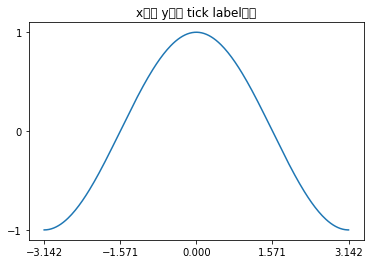

In [24]:
import numpy as np 
x = np.linspace(-np.pi , np.pi , 256)
c = np.cos(x)
plt.title("x축과 y축의 tick label설정")
plt.plot(x , c)
plt.xticks([-np.pi , -np.pi / 2 , 0 , np.pi / 2 , np.pi])
plt.yticks([-1 , 0 , + 1])
plt.show()

/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backe

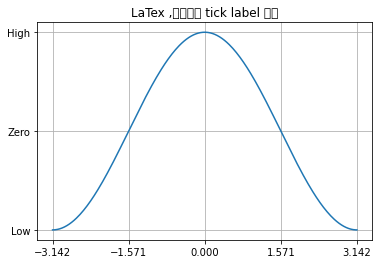

In [25]:
x = np.linspace(-np.pi , np.pi , 256)
c = np.cos(x)
plt.title("LaTex ,문자열로 tick label 정의")
plt.plot(x , c)
plt.xticks([-np.pi , -np.pi / 2 , 0 , np.pi / 2 , np.pi])
plt.yticks([-1 , 0 , 1] , ["Low" , "Zero" , "High"])
plt.grid(True)
plt.show()

/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backe

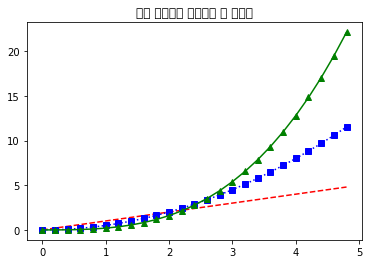

In [27]:
t = np.arange(0. , 5. ,0.2)
plt.title("라인 플롯에서 여러개의 선 그리기")
plt.plot(t, t, "r--" , t , 0.5 * t **2 , "bs:" , t , 0.2 * t**3 , "g^-")

/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backe

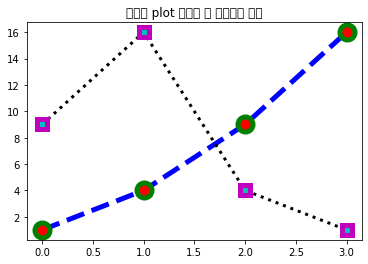

In [28]:
plt.title("복수의 plot 명령을 한 그림에서 표현")
plt.plot([1,4,9,16],
        c = "b" , lw = 5 , ls = "--" , marker = "o" , ms = 15 , mec = "g" , mew = 5 , mfc = "r")
plt.plot([9,16,4,1],
        c = "k" , lw = 3 , ls = ":" , marker = "s" , ms = 10 , mec = "m" , mew = 5 , mfc = "c")
plt.show()

/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47484 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backe

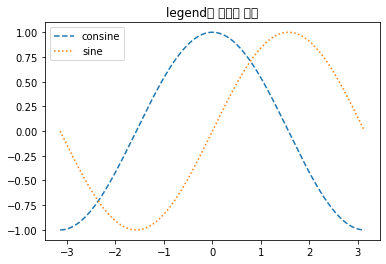

In [29]:
x = np.linspace(-np.pi , np.pi , 256)
c ,s = np.cos(x) , np.sin(x)
plt.title("legend를 표시한 플롯")
plt.plot(x , c , ls = "--" , label = 'consine')
plt.plot(x , s , ls = ":" , label = 'sine')
plt.legend(loc = 2)
plt.show()

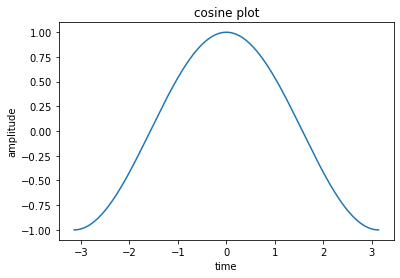

In [30]:
x = np.linspace(-np.pi , np.pi , 256)
c ,s = np.cos(x) ,np.sin(x)
plt.plot(x ,c , label = "cosine")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("cosine plot")
plt.show()

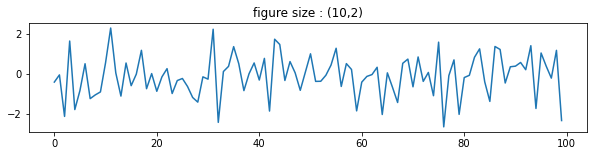

In [31]:
np.random.seed(2)
f1 = plt.figure(figsize = (10,2))
plt.title("figure size : (10,2)")
plt.plot(np.random.randn(100))
plt.show()

Figure(432x288) 5988924288
Figure(432x288) 5988924288


/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51116 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backe

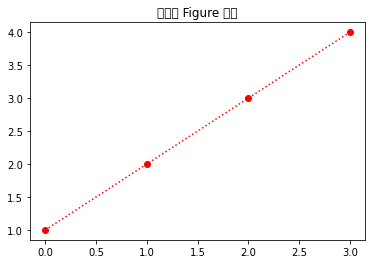

In [32]:
f1 = plt.figure(1)
plt.title("현재의 Figure 객체")
plt.plot([1,2,3,4] , "ro:")

f2 = plt.gcf()
print(f1 , id(f1))
print(f2 , id(f2))
plt.show()

AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


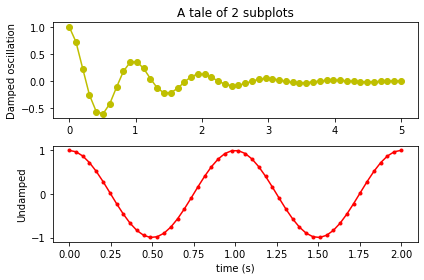

In [33]:
x1 = np.linspace(0.0 , 5.0)
x2 = np.linspace(0.0 , 2.0)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

ax1 = plt.subplot(2 ,1 ,1)
plt.plot(x1 , y1 , "yo-")
plt.title("A tale of 2 subplots")
plt.ylabel("Damped oscillation")
print(ax1)

ax2 = plt.subplot(2 ,1 ,2)
plt.plot(x2 , y2 , "r.-")
plt.xlabel("time (s)")
plt.ylabel("Undamped")
print(ax2)

plt.tight_layout()
plt.show()

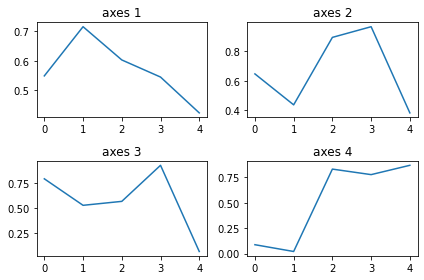

In [34]:
np.random.seed(0)

plt.subplot(221)
plt.plot(np.random.rand(5))
plt.title("axes 1")

plt.subplot(222)
plt.plot(np.random.rand(5))
plt.title("axes 2")

plt.subplot(223)
plt.plot(np.random.rand(5))
plt.title("axes 3")

plt.subplot(224)
plt.plot(np.random.rand(5))
plt.title("axes 4")

plt.tight_layout()
plt.show()

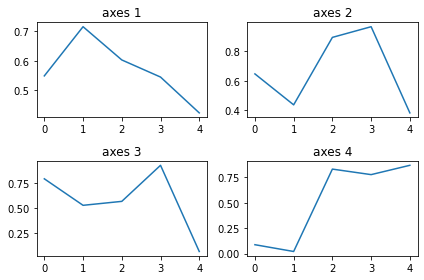

In [35]:
fig , axes = plt.subplots(2,2)

np.random.seed(0)
axes[0,0].plot(np.random.rand(5))
axes[0,0].set_title("axes 1")
axes[0,1].plot(np.random.rand(5))
axes[0,1].set_title("axes 2")
axes[1,0].plot(np.random.rand(5))
axes[1,0].set_title("axes 3")
axes[1,1].plot(np.random.rand(5))
axes[1,1].set_title("axes 4")

plt.tight_layout()
plt.show()

In [36]:
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

mpl.rc("font" , family = "NanumBarunpenBold")
mpl.rc("axes" , unicode_minus = False)

/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backe

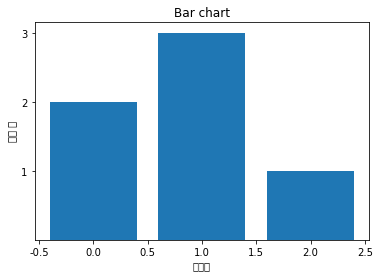

In [37]:
colors = ["blue" , "green" , "red"] 
y = [2,3,1]
x = np.arange(len(y))

xlabel = ["가" , "나" , "다"]
plt.title("Bar chart")
plt.bar(x , y)
plt.yticks(sorted(y))
plt.yticks(y)
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.show()

[ 8.48813504 10.15189366  9.02763376  8.44883183]
[0.4236548  0.64589411 0.43758721 0.891773  ]


/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 46972 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48296 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47329 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52632 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/panhong/miniforge3/lib/python3.9/site-packages/matplotlib/backe

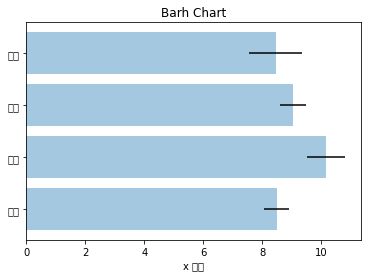

In [38]:
np.random.seed(0)

people = ["몽룡" , "춘향" , "방자" , "향단"]
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))
print(performance)
print(error)

plt.title("Barh Chart")
plt.barh(y_pos , performance , xerr = error , alpha = 0.4)
plt.yticks(y_pos , people)
plt.xlabel('x 라벨')
plt.show()

In [39]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

[ 8.48813504 10.15189366  9.02763376  8.44883183]
[0.4236548  0.64589411 0.43758721 0.891773  ]


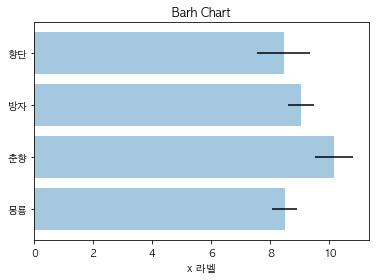

In [40]:
np.random.seed(0)

people = ["몽룡" , "춘향" , "방자" , "향단"]
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))
print(performance)
print(error)

plt.title("Barh Chart")
plt.barh(y_pos , performance , xerr = error , alpha = 0.4)
plt.yticks(y_pos , people)
plt.xlabel('x 라벨')
plt.show()

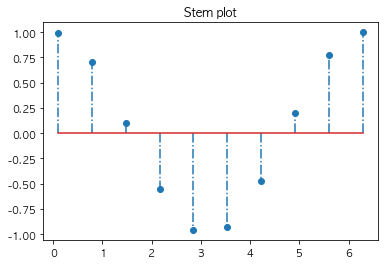

In [41]:
x = np.linspace(0.1 , 2 * np.pi , 10)
plt.title("Stem plot")
plt.stem(x , np.cos(x) , "-.")
plt.show()

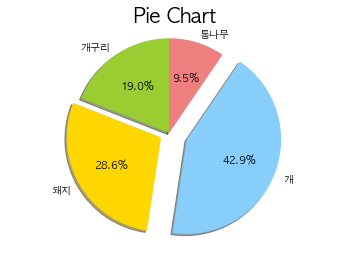

In [42]:
# 파이차트
labels = ["개구리" , "돼지" , "개" , "통나무"]
sizes = [20,30,45,10]
colors = ["yellowgreen" , "gold" , "lightskyblue" , "lightcoral"]
explode = (0,0.1,0.2,0)
plt.title("Pie Chart" , fontdict = {"fontsize" : 20})
plt.pie(sizes , explode = explode , labels = labels , colors = colors,
       autopct = "%1.1f%%" , shadow = True , startangle = 90)
plt.axis("equal")
plt.show()

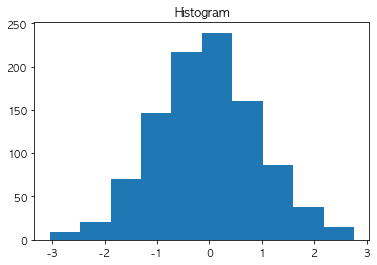

In [43]:
# 히스토 그램 
np.random.seed(0)
x = np.random.randn(1000)
plt.title("Histogram")
arrays , bins , patches = plt.hist(x , bins = 10)
plt.show()

In [44]:
np.random.seed(0)
x = np.random(0 , 1 , 100)
y = np.random(0 , 1 , 100)
plt.title("Scatter plot")
plt.scatter(x , y , color = "yellowgreen")
plt.show()

TypeError: 'module' object is not callable

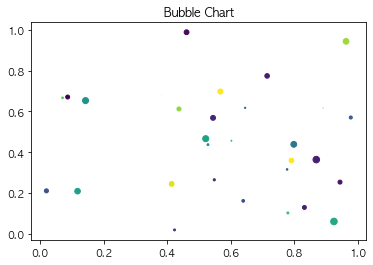

In [45]:
N = 30 
np.random.seed(0)
x = np.random.rand(N)
y1 = np.random.rand(N)
y2 = np.random.rand(N)
y3 = np.pi * (15 * np.random.rand(N) ** 2)
plt.title("Bubble Chart")
plt.scatter(x , y1 , c = y2 , s = y3)
plt.show()

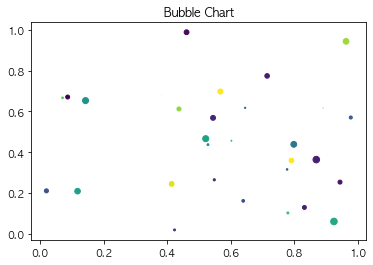

In [46]:
N = 30 
np.random.seed(0)
x = np.random.rand(N)
y1 = np.random.rand(N)
y2 = np.random.rand(N)
y3 = np.pi * (15 * np.random.rand(N) ** 2)
plt.title("Bubble Chart")
plt.scatter(x , y1 , c = y2 , s = y3)
plt.show()

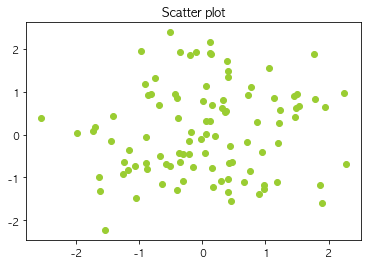

In [47]:
np.random.seed(0)
x = np.random.normal(0 , 1 , 100)
y = np.random.normal(0 , 1 , 100)
plt.title("Scatter plot")
plt.scatter(x , y , color = "yellowgreen")
plt.show()

In [48]:
from sklearn.datasets import load_digits
digits = load_digits()
print(type(digits))
x = digits.images[0]
x

<class 'sklearn.utils.Bunch'>


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

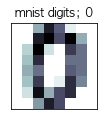

In [49]:
plt.title("mnist digits; 0")
plt.imshow(x , interpolation = "nearest" , cmap = plt.cm.bone_r)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplots_adjust(left = 0.35 , right = 0.65 , bottom = 0.35 , top = 0.65)
plt.show()

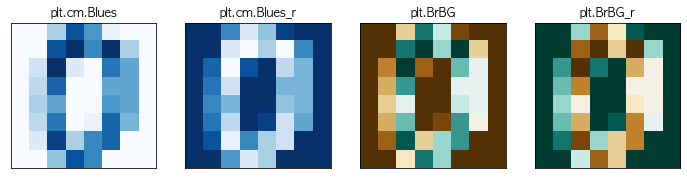

In [50]:
fig , axes = plt.subplots(1, 4 , figsize = (12 , 3) ,
                          subplot_kw = {"xticks" : [] , "yticks" : []})
axes[0].set_title("plt.cm.Blues")
axes[0].imshow(x , interpolation = "nearest" , cmap = plt.cm.Blues)
axes[1].set_title("plt.cm.Blues_r")
axes[1].imshow(x , interpolation = "nearest" , cmap = plt.cm.Blues_r)
axes[2].set_title("plt.BrBG")
axes[2].imshow(x , interpolation = "nearest" , cmap = plt.cm.BrBG)
axes[3].set_title("plt.BrBG_r")
axes[3].imshow(x , interpolation = "nearest" , cmap = plt.cm.BrBG_r)


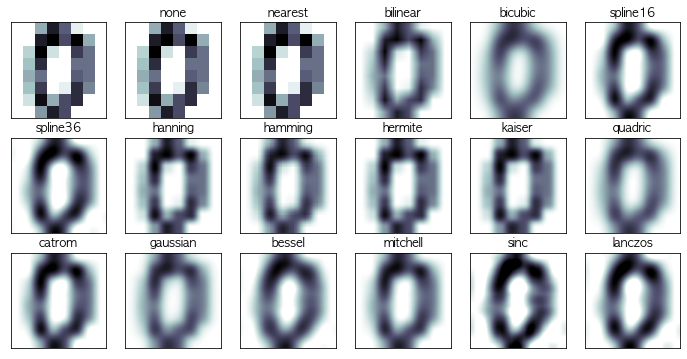

In [51]:
methods = [
    None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
    'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
    'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'
]
fig ,axes = plt.subplots(3 , 6 , figsize = (12 , 6),
                        subplot_kw = {"xticks" : [] , "yticks" : []})
for ax , interp_method in zip(axes.flat , methods):
    ax.imshow(x , cmap = plt.cm.bone_r , interpolation = interp_method)
    ax.set_title(interp_method)
plt.show()

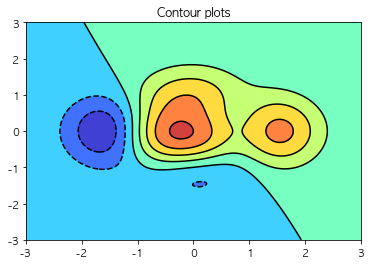

In [52]:
def f(x ,y):
    return(1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 -y ** 2)
n = 256
x = np.linspace(-3 , 3 , n)
y = np.linspace(-3 , 3 , n)
xx , yy = np.meshgrid(x , y)
zz = f(xx , yy)

plt.title("Contour plots")
plt.contourf(xx , yy , zz ,alpha = .75 , cmap = "jet")
plt.contour(xx , yy , zz , colors = "black")
plt.show()

<ipython-input-53-ea6b52913fbd>:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


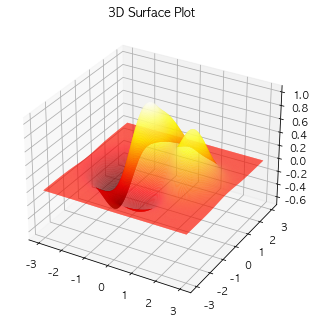

In [53]:
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-4 , 4 , 0.25)
Y = np.arange(-4 , 4 , 0.25)
XX , YY = np.meshgrid(X , Y)
RR = np.sqrt(XX ** 2 + YY ** 2)
ZZ = np.sin(RR)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_title("3D Surface Plot")
ax.plot_surface(xx , yy , zz , rstride = 1 , cstride = 1,  cmap = "hot")
plt.show()

In [54]:
data = [[0.3 , 12.27] , [-0.78 , 14.44] , [0.03 , 18.75] , [1.11 , 17.52] , [15.17 , 9.29] , [0.24 , 16.37] , [-0.24 , 19.78] , [-0.47 , 19.51] , [-0.77 , 12.65] , [-0.37 , 14.74] , [-0.85 , 10.72] , [-0.41 , 21.94] , [-0.27 , 12.83] , [0.02 , 15.51] , [-0.76 , 17.14] , [2.66 , 14.42]] 

del data[4]
x_data = [i[0] for i in data]
y_data = [i[1] for i in data]

a = tf.Variable(0 , dtype = tf.float64)
b = tf.Variable(0 , dtype = tf.float64)

y = a * x_data + b

rmse = tf.sqrt(tf.reduce_mean(tf.square(y - y_data)))
learning_rate = 0.001

gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        sess.run(gradient_decent)
        if step % 5000 == 0:
            print("Epoch: %f , RMSE = %.04f , 기울기 a = %.4f , y절편 b = %.4f" %(step , sess.run(rmse) , sess.run(a) , sess.run(b)))
    data_a = sess.run(a)
    data_b = sess.run(b)
    
line_x = np.arange(min(x_data) , max(x_data) , 0.01)
line_y = data_a * line_x + data_b
print(line_x)
print(line_y)

plt.plot(x_data , y_data , "bo") # bo는 점선 
plt.plot(line_x , line_y ,"r-") # r- 는 직선
plt.show()


NameError: name 'tf' is not defined